# Playground

Used for testing on the fly new features

In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from PytorchModulePCA import PytorchModulePCA
from fastai.vision import *
from fastai.layers import simple_cnn

TRAIN = False

train_ds = MNIST(root='~/Documents/datasets/', download=True, transform=ToTensor())
train_dl = DataLoader(train_ds, num_workers=14, batch_size=128, shuffle=True)
test_ds = MNIST(root='~/Documents/datasets/', download=True, transform=ToTensor(), train=False)
test_dl = DataLoader(test_ds, num_workers=14, batch_size=128, shuffle=False)

data = ImageDataBunch(train_dl, test_dl) # create DataBunch

model = simple_cnn((1, 16, 32, 10)).cuda() # a random model

In [37]:
learn = Learner(data, model, path='./', loss_func=CrossEntropyFlat())
learn.metrics=[accuracy]
# train and store
if TRAIN:
    learn.fit(10, lr=1e-03)
    learn.save('mnist-simple', return_path=True)

In [79]:
learn.load('./mnist-simple')

model = learn.model
last_conv_layer = model[2][0] # get the last conv layer

module_pca = PytorchModulePCA(model.eval(), last_conv_layer.eval(), learn.data.valid_dl)
module_pca(k=8, n_batches=10) # run only on 4 batches
# module_pca.plot() # plot
# module_pca.annotate()
# plt.savefig('./images/example')
df = module_pca.state.to_df() # get the points as pandas df
print(df)


           points_0    points_1    points_2    points_3   points_4  \
indices                                                              
0        -91.521240   53.242428  -61.389366  -22.779617  45.185722   
1         47.350002 -168.253448  -22.807234   -0.183295 -42.423176   
2       -130.872528  -79.828278  -42.446507    2.549332 -24.968752   
3         64.927498  -24.944941   53.329926   76.857300  67.908936   
4        -14.285883   13.938684   24.611818 -104.229637  47.068760   
5       -134.777618  -61.850677  -61.563400   33.364231 -18.772676   
6          3.496940   57.236794   34.247627   -5.531485   6.663450   
7        -35.232468   51.734131   41.929054  -30.687901 -27.221844   
8         41.691612  -43.532780  -37.660072  -83.545441  25.420570   
9        -22.858402  102.794357   67.628235  103.337296  22.705271   
10       115.410004 -154.848419  -39.280640  -38.553352  59.210217   
11        31.998203  -85.924500   59.203789  -10.146079  24.515236   
12       -49.699047

In [80]:
from sklearn.neighbors import KDTree

In [81]:
X = module_pca.state.points.numpy()
tree = KDTree(X)

In [82]:
dist, ind = tree.query(X[:1], k=5)

imgs = [module_pca.dataloader.dataset[i][0].permute(1, 2, 0).numpy().squeeze() for i in ind[0]]

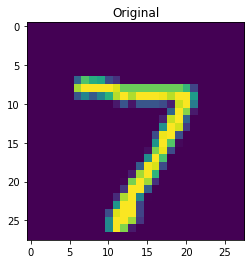

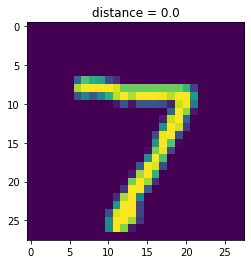

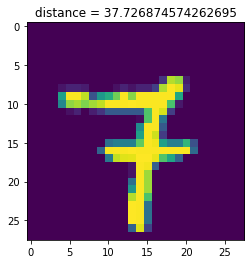

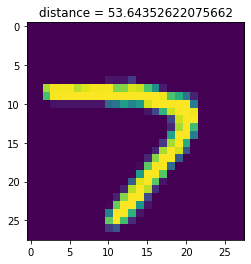

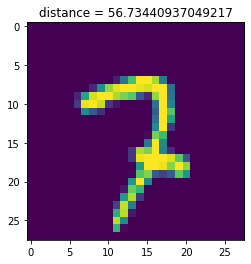

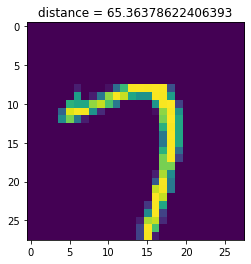

In [84]:
fig = plt.figure()
plt.title('Original')
plt.imshow(module_pca.dataloader.dataset[0][0].permute(1, 2, 0).numpy().squeeze())
plt.show()
for d, img in zip(dist[0], imgs):
    fig = plt.figure()
    plt.title(f"distance = {d}")
    plt.imshow(img)
    plt.show()